In [2]:
import cv2 # tested with 3.1.0 version
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 2. Image Enhancement
## 2.1 Histogram

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


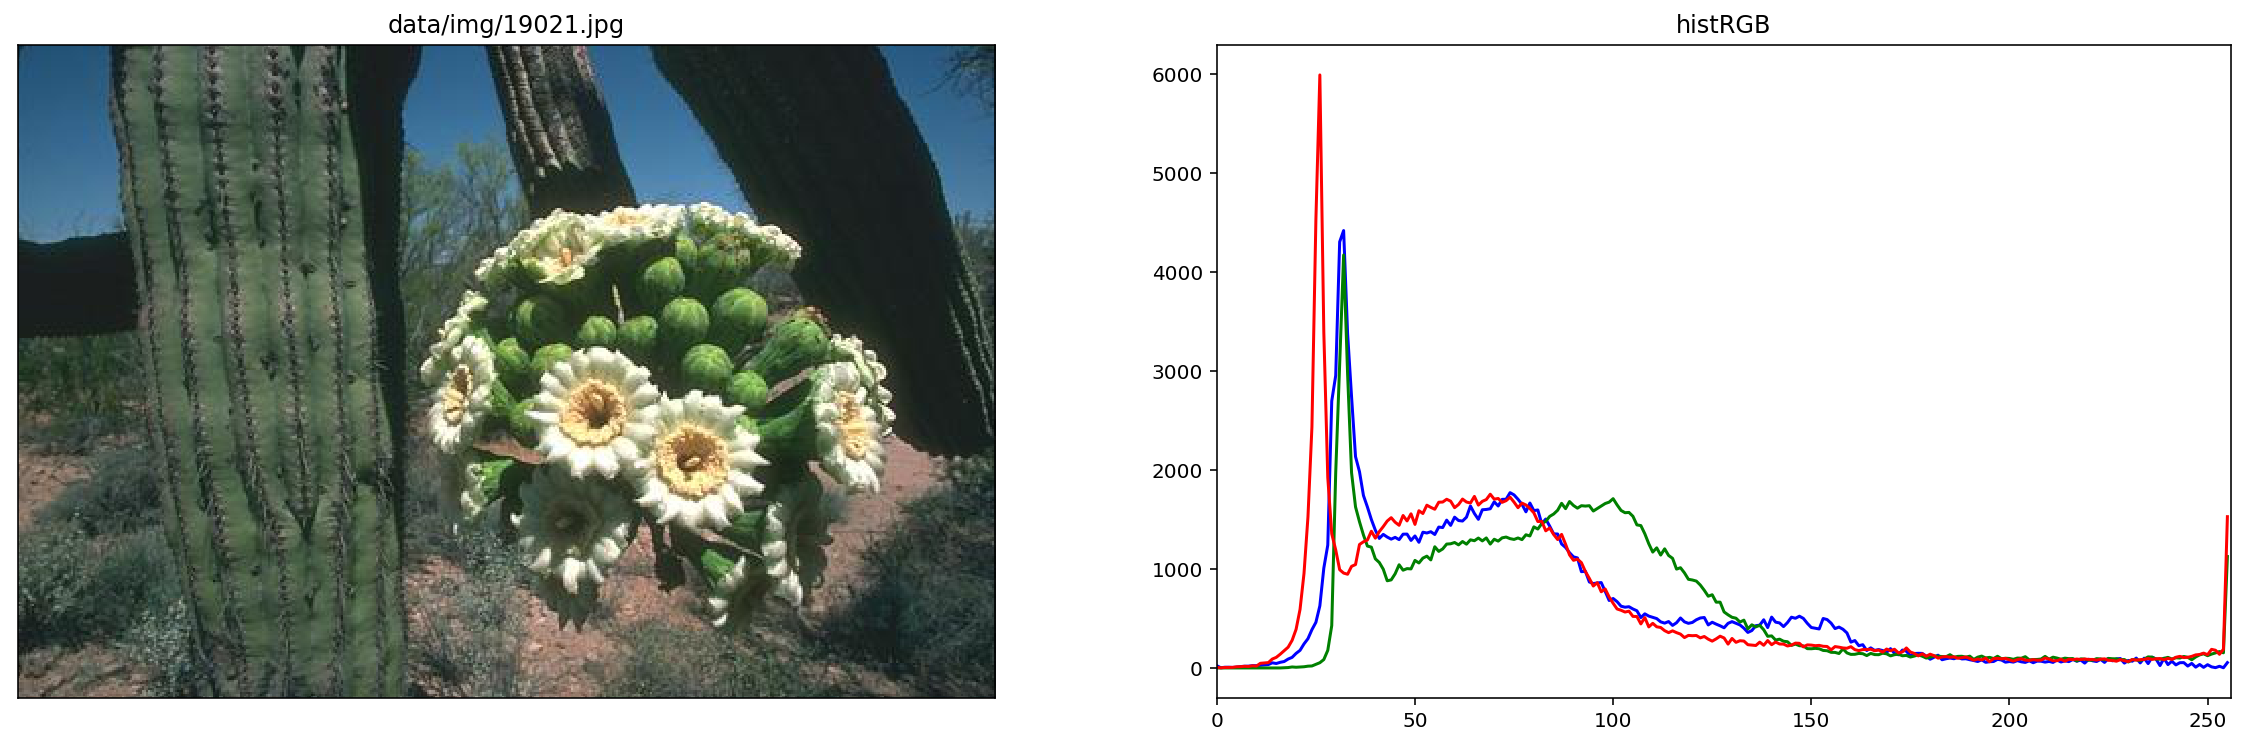

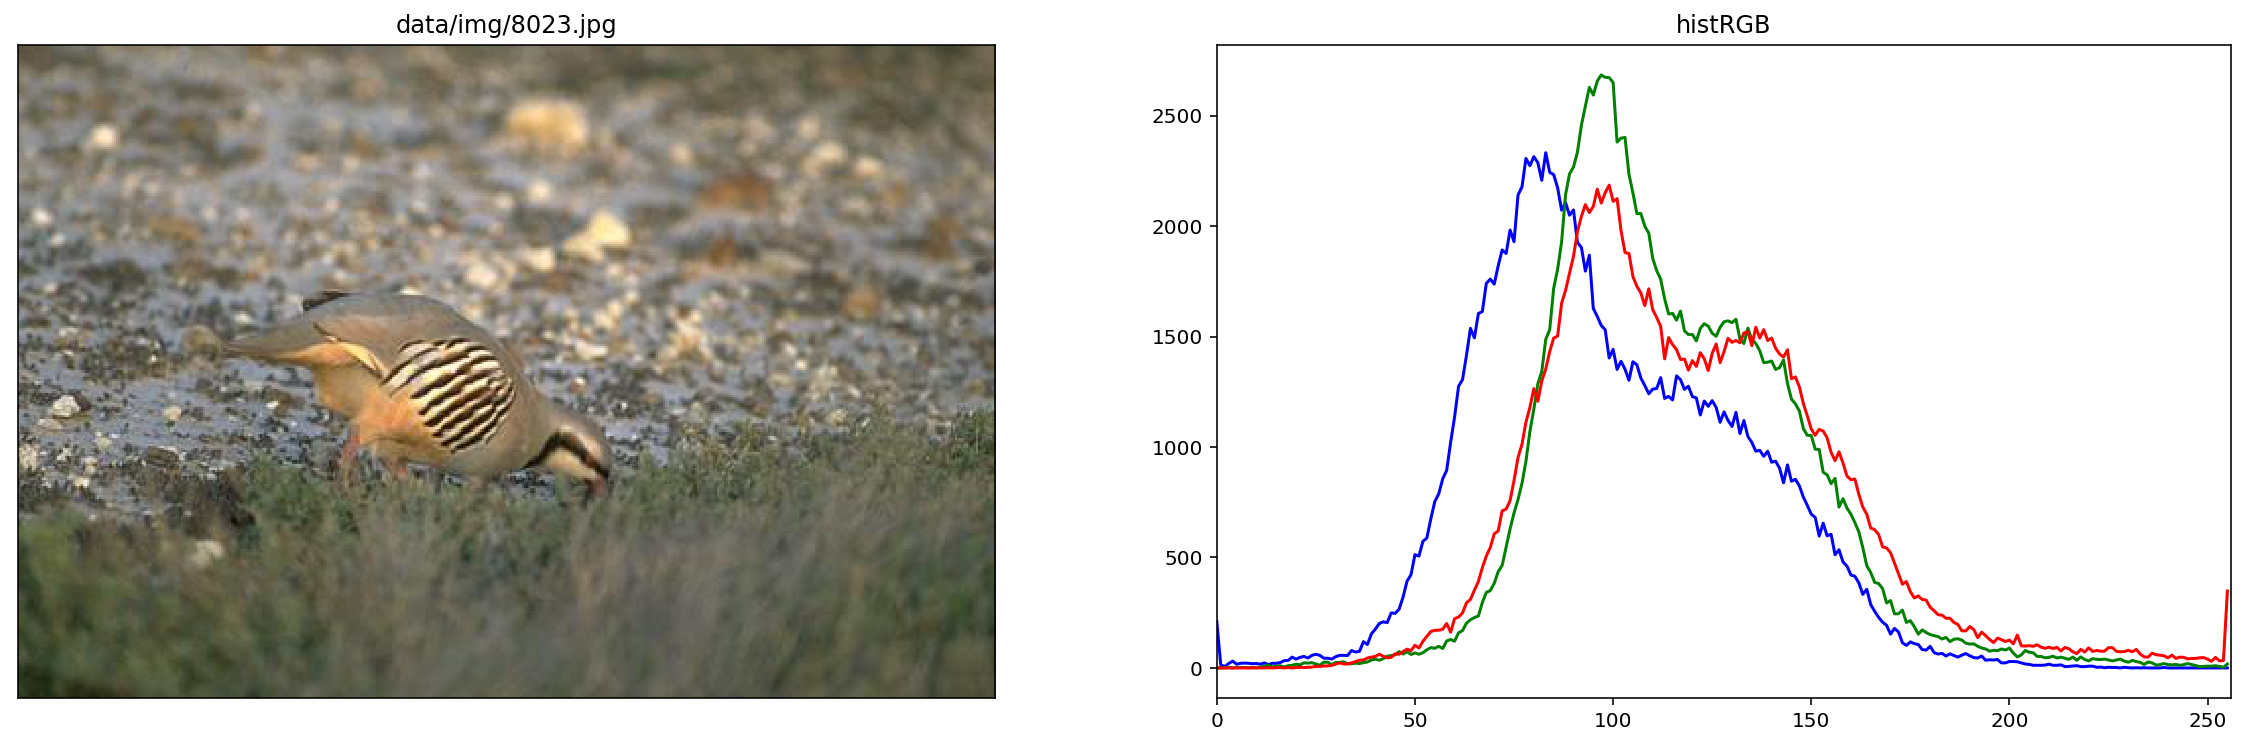

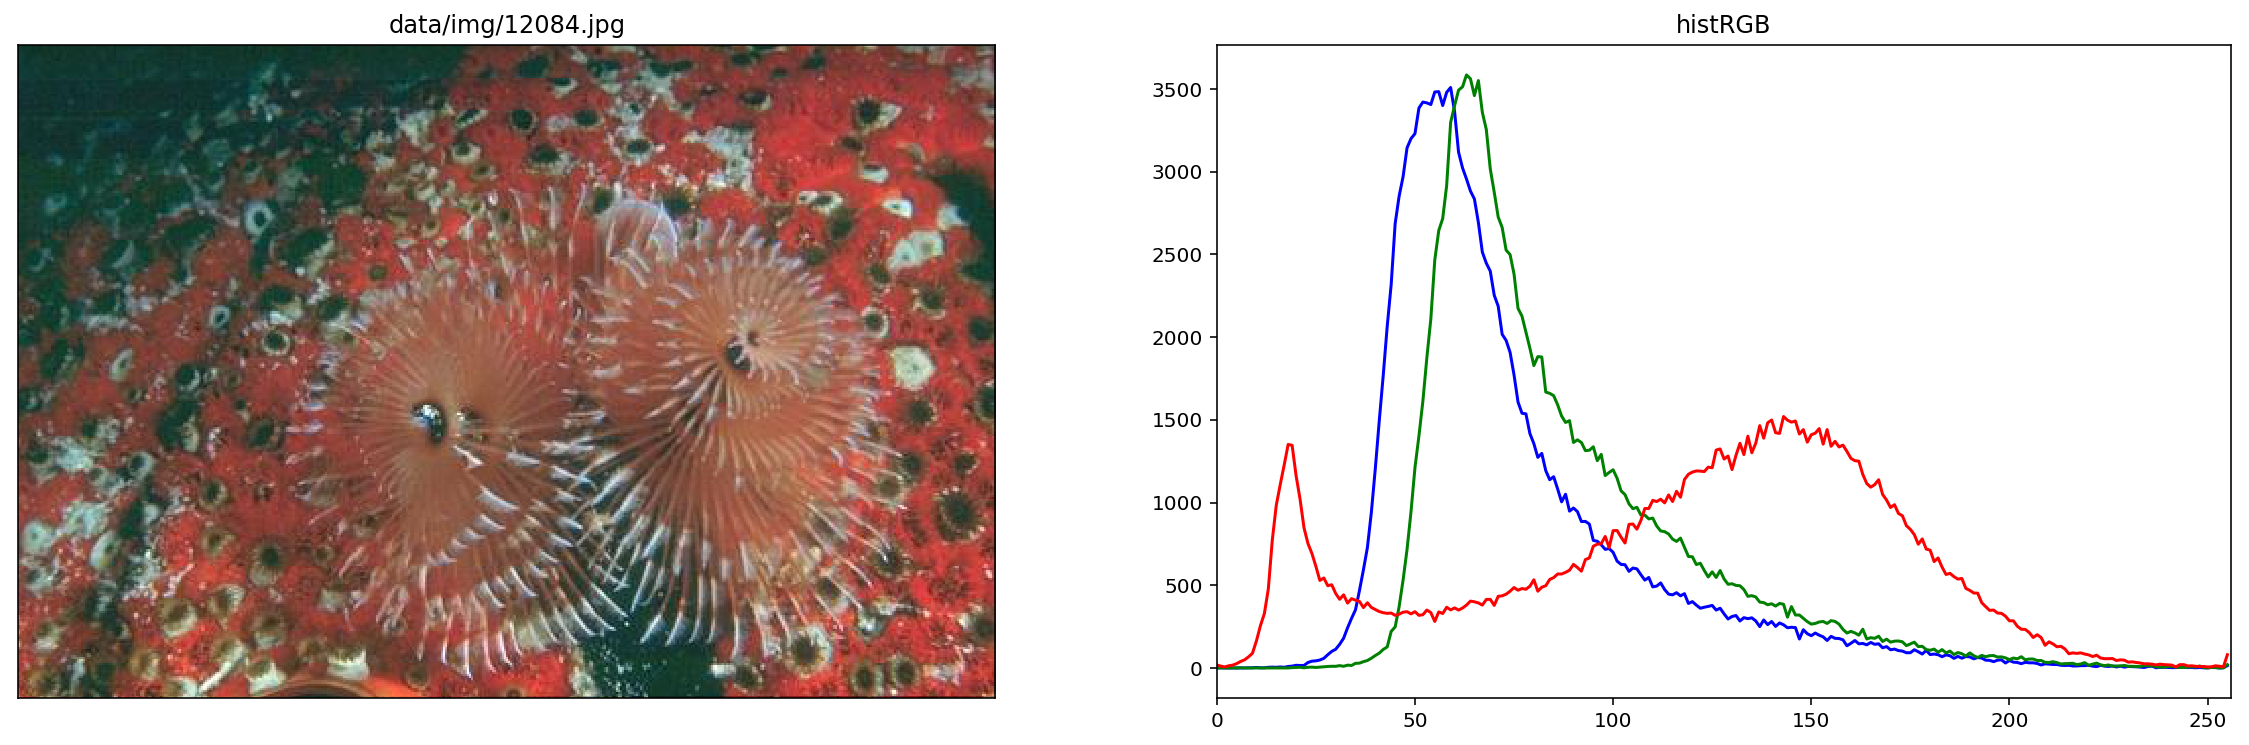

In [7]:
IMG_NAMES = ['19021.jpg', '8023.jpg', '12084.jpg'] # Take any 3 images from the dataset in "data/img"

def show_histRGB(img, imagepath):
    color = ('b', 'g', 'r')
    plt.figure(figsize=(20, 6)) # Figure size can be adjusted.
    plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # show the corresponding rgb image using pyplot.
    plt.xticks([]), 
    plt.yticks([])
    plt.title(imagepath)
    for i, col in enumerate(color):
        # a) Calculate the histograms for this image.
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.subplot(122), plt.plot(histr, color = col) # plot histogram with the b g r channels.
        plt.xlim([0, 256])
        plt.title("histRGB")
    plt.show()
    
for imagename in IMG_NAMES:
    imagepath = os.path.join('data/img/', imagename)
    img = cv2.imread(imagepath) # read the image from image path using opencv.
    show_histRGB(img, imagepath)

### b) What can you say about the spread of the color intensities for these images? (Please briefly answer this question in this block)
These pistures explored in a suitable way. And I found when the curve in the histogram in in the right area, then the picture is brighter.

## 2.2 Global Histogram Equalization

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


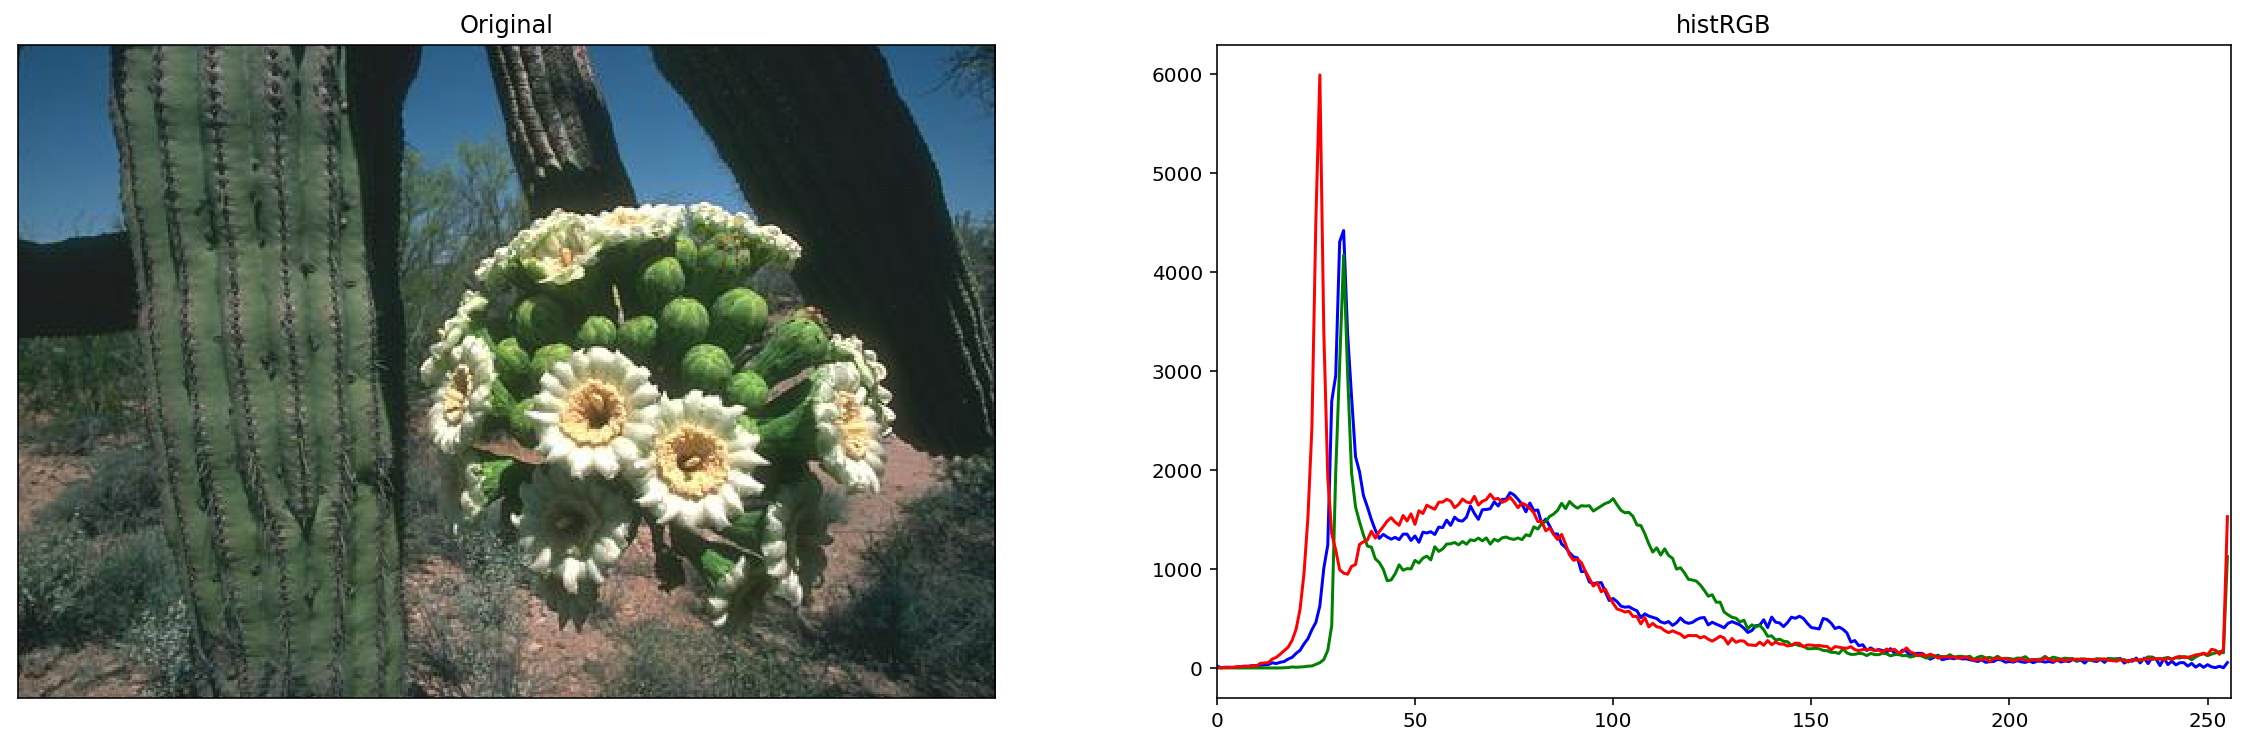

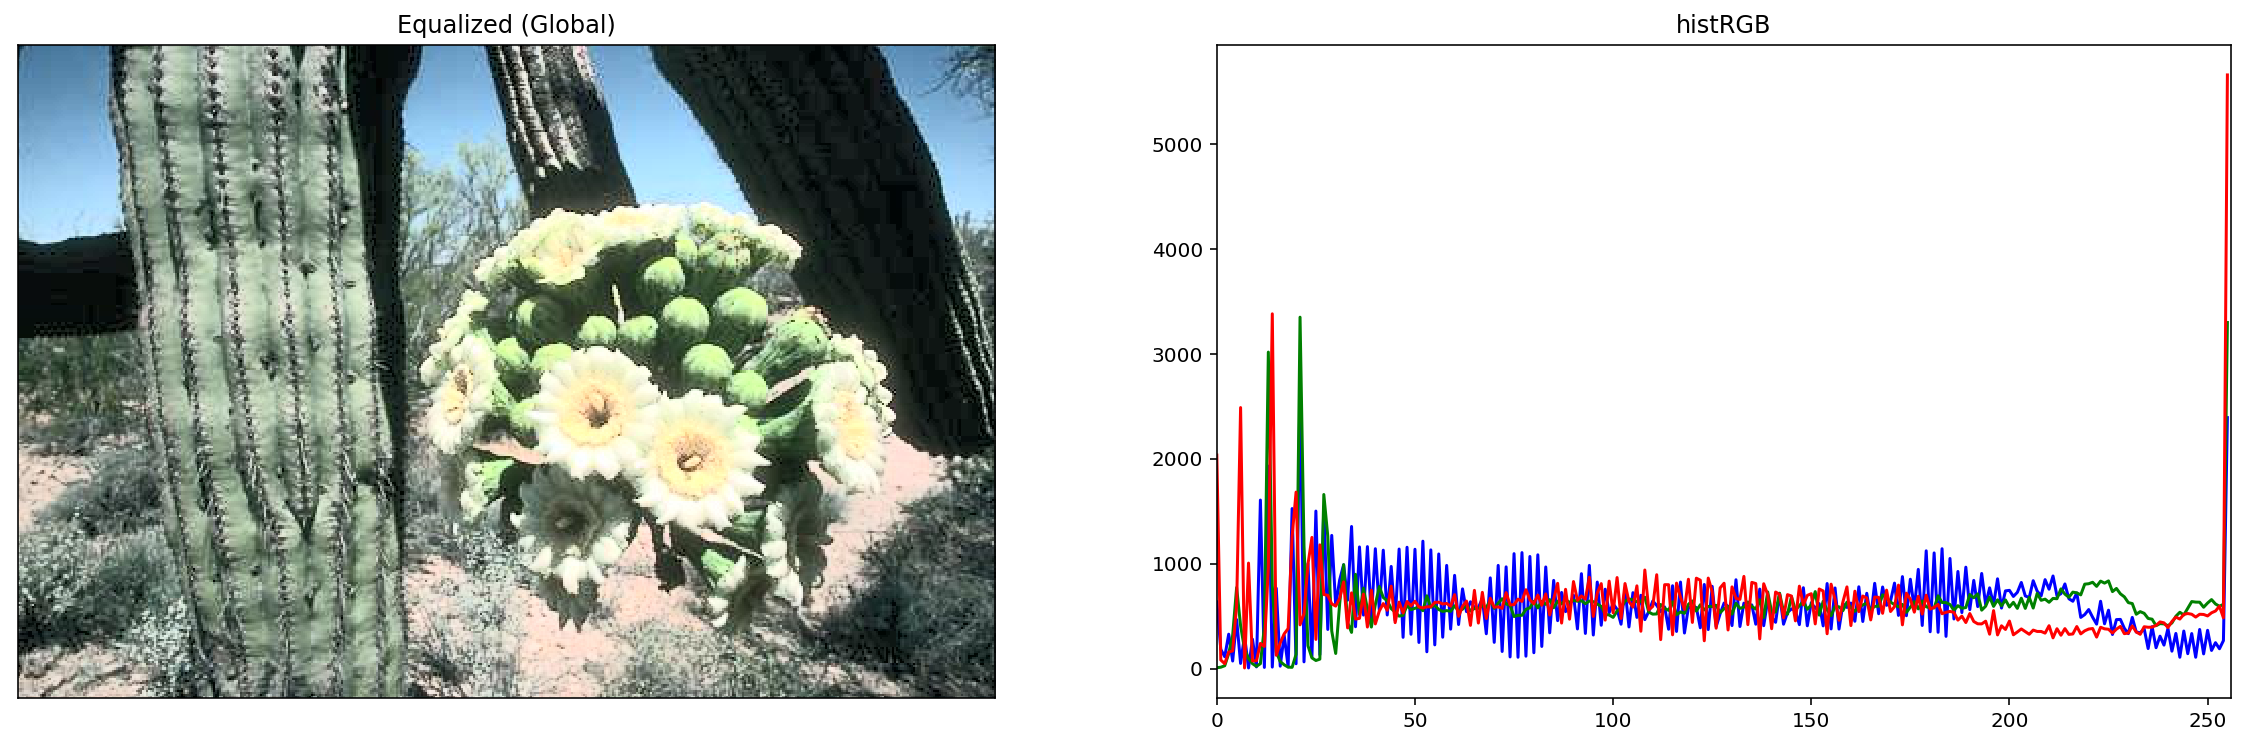

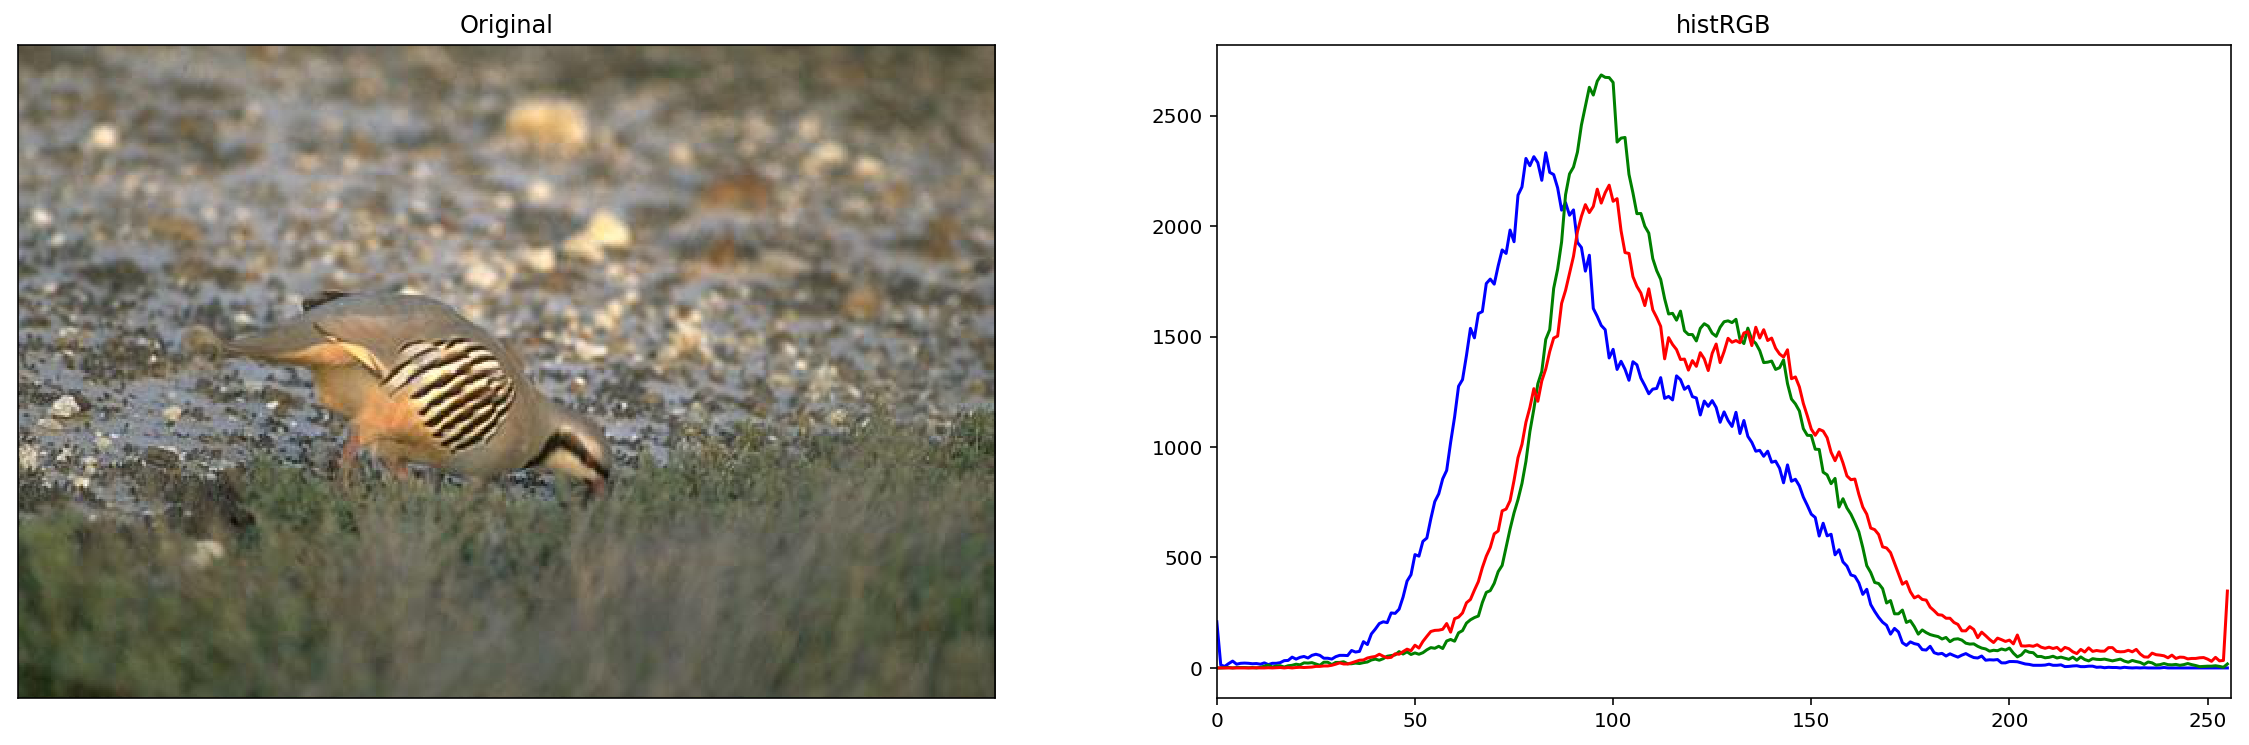

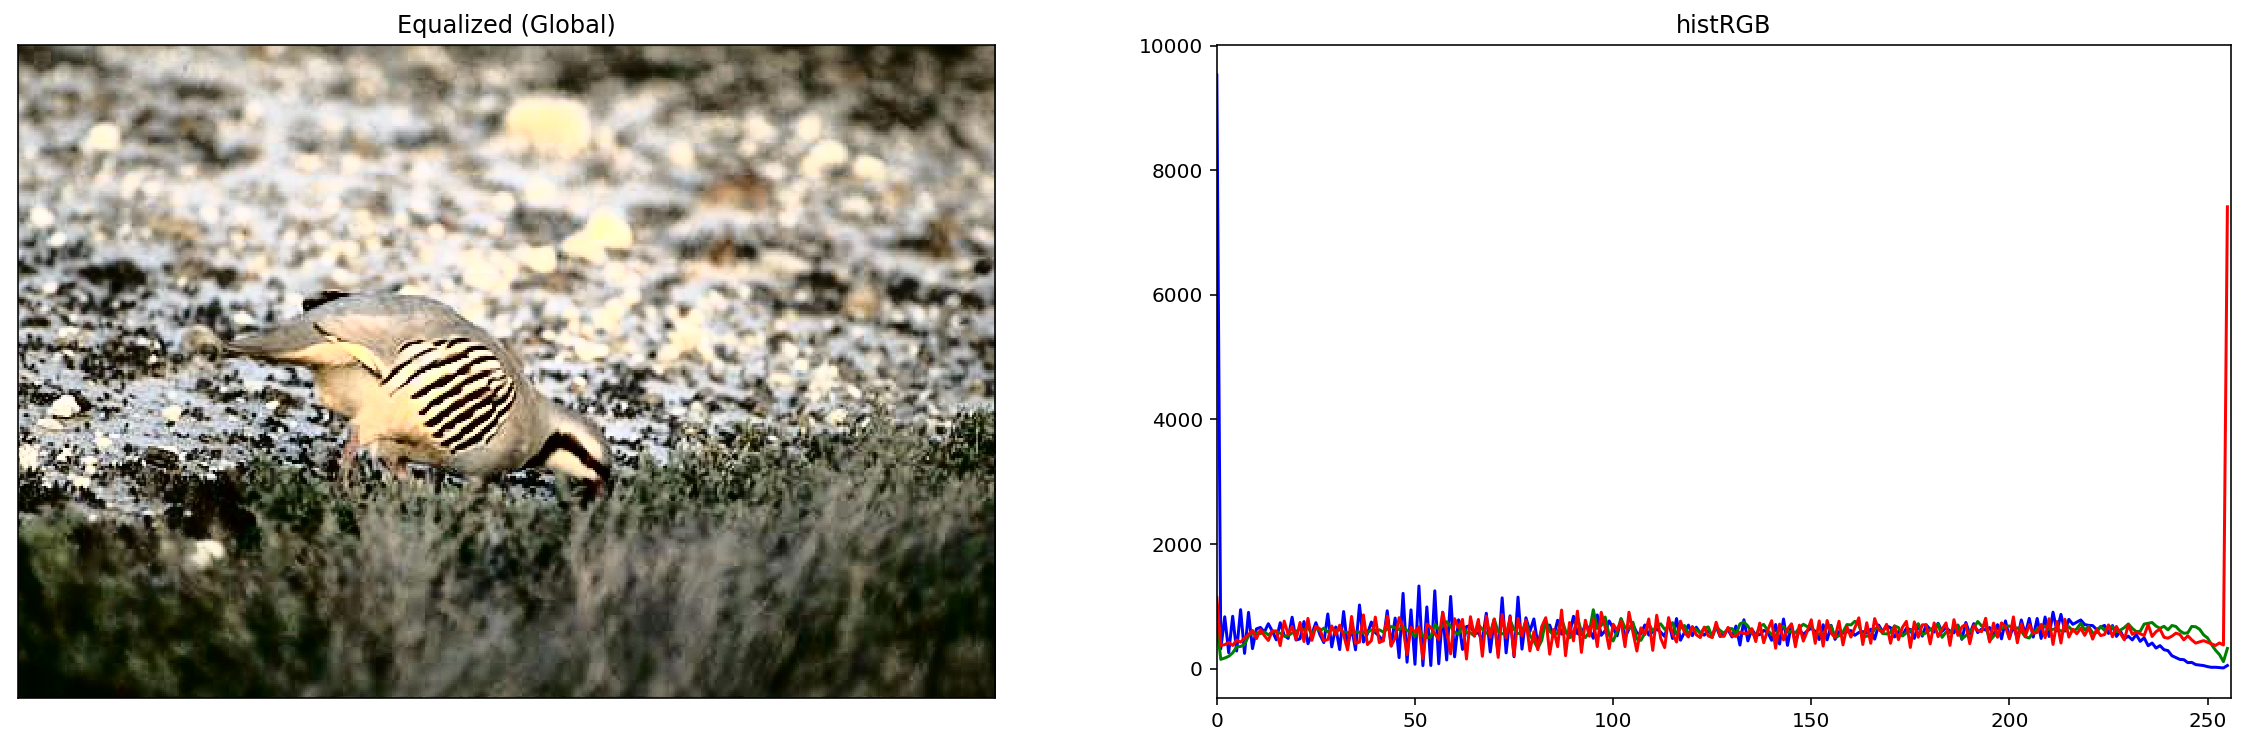

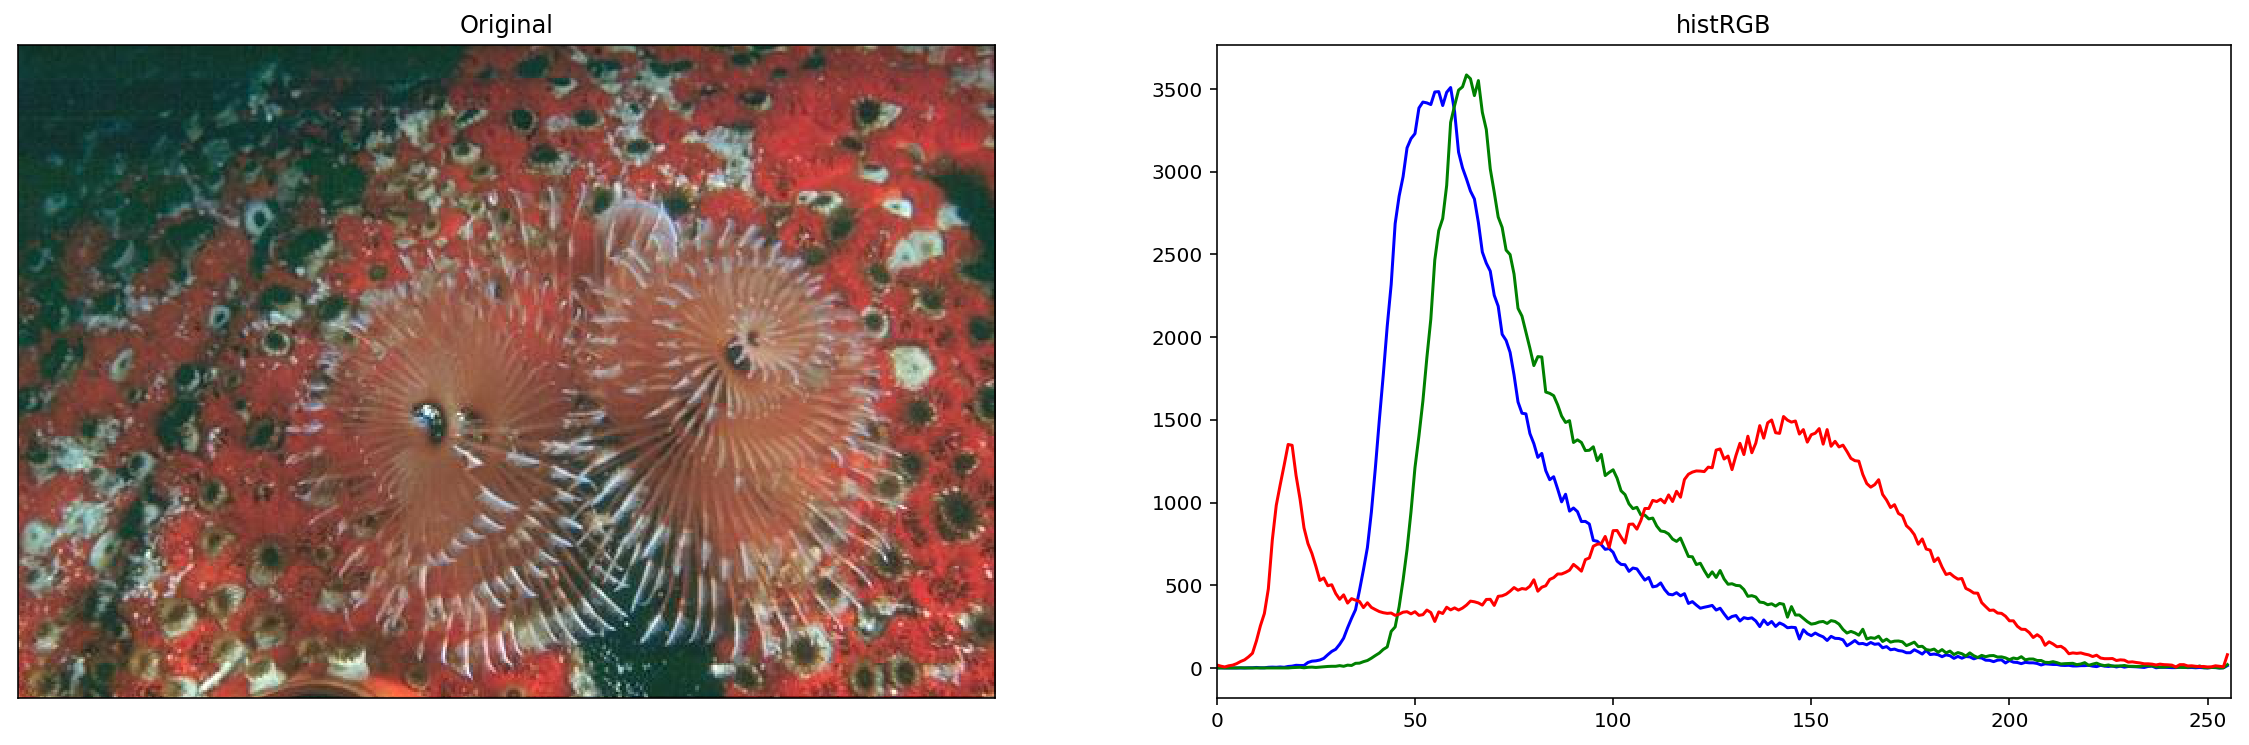

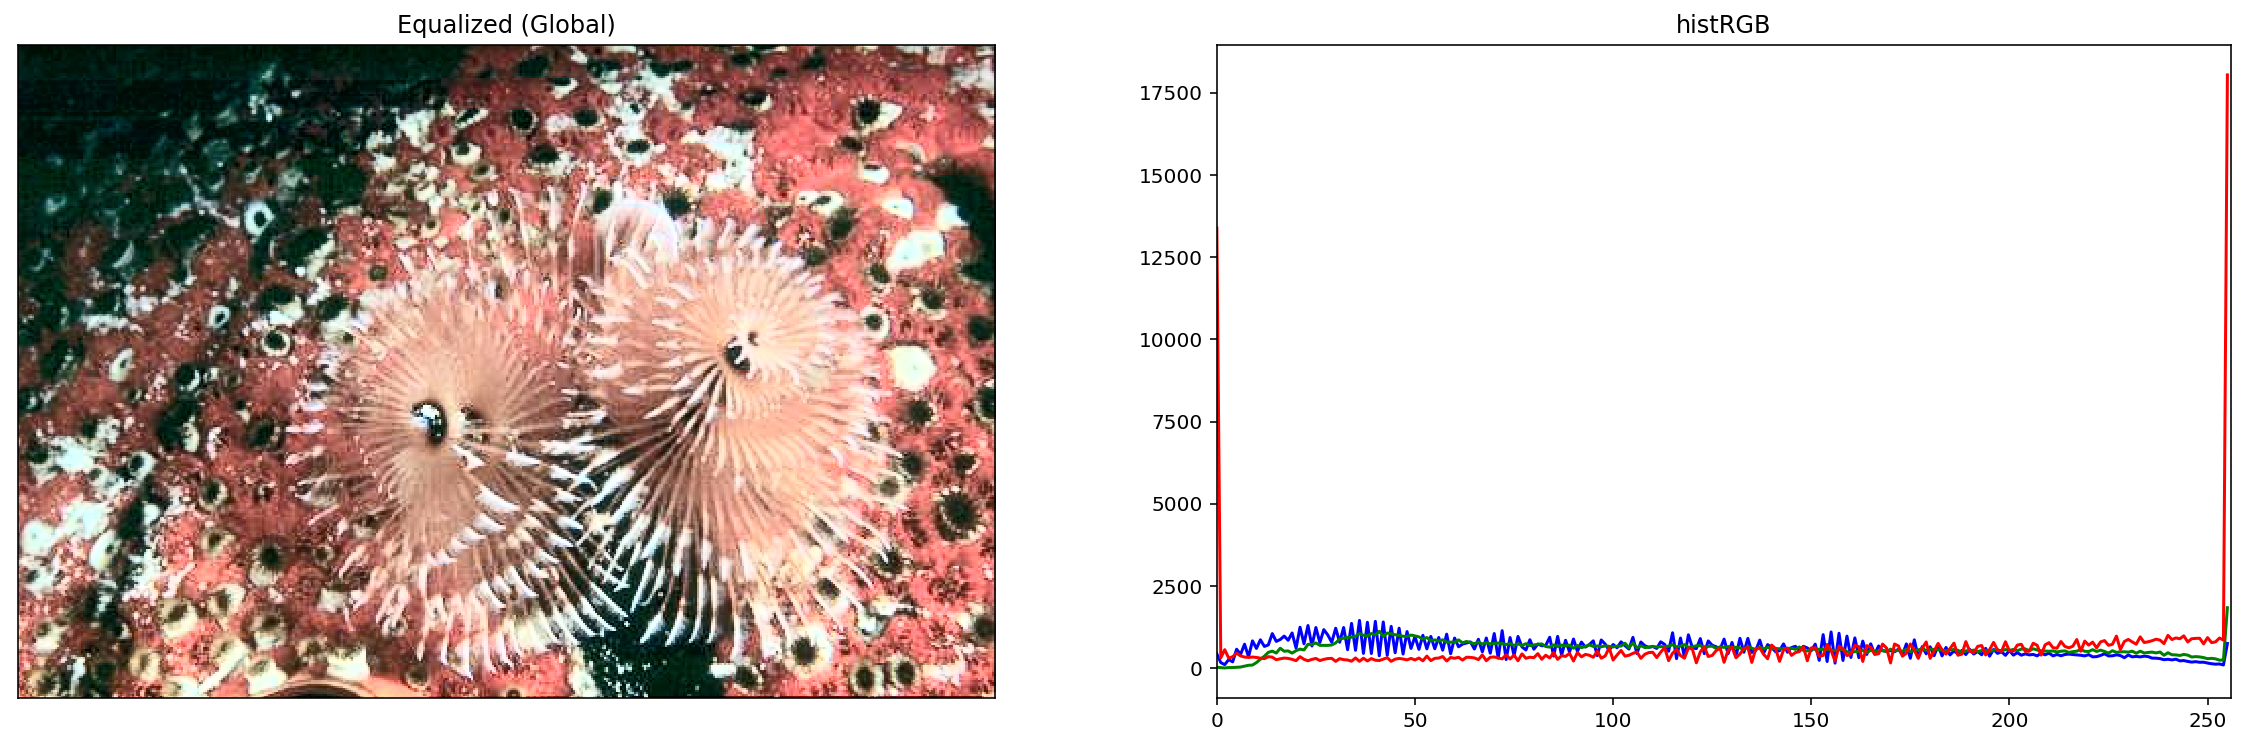

In [4]:
def histogram_equalization(imagepath):
    img = cv2.imread(imagepath) # Read the image in color
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV) # Convert the image to YUV
    y,u,v = cv2.split(img_yuv)
    y = cv2.equalizeHist(y) # Apply global histogram equalization on Y channel
    img_yuv = cv2.merge([y,u,v])
    equ = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)# Convert back to GBR 
    show_histRGB(img, "Original")
    show_histRGB(equ, "Equalized (Global)")
    
for imagename in IMG_NAMES:
    imagepath = os.path.join('data/img/', imagename)
    histogram_equalization(imagepath)


## 2.3 Adaptive Histogram Equalization (CLAHE)

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


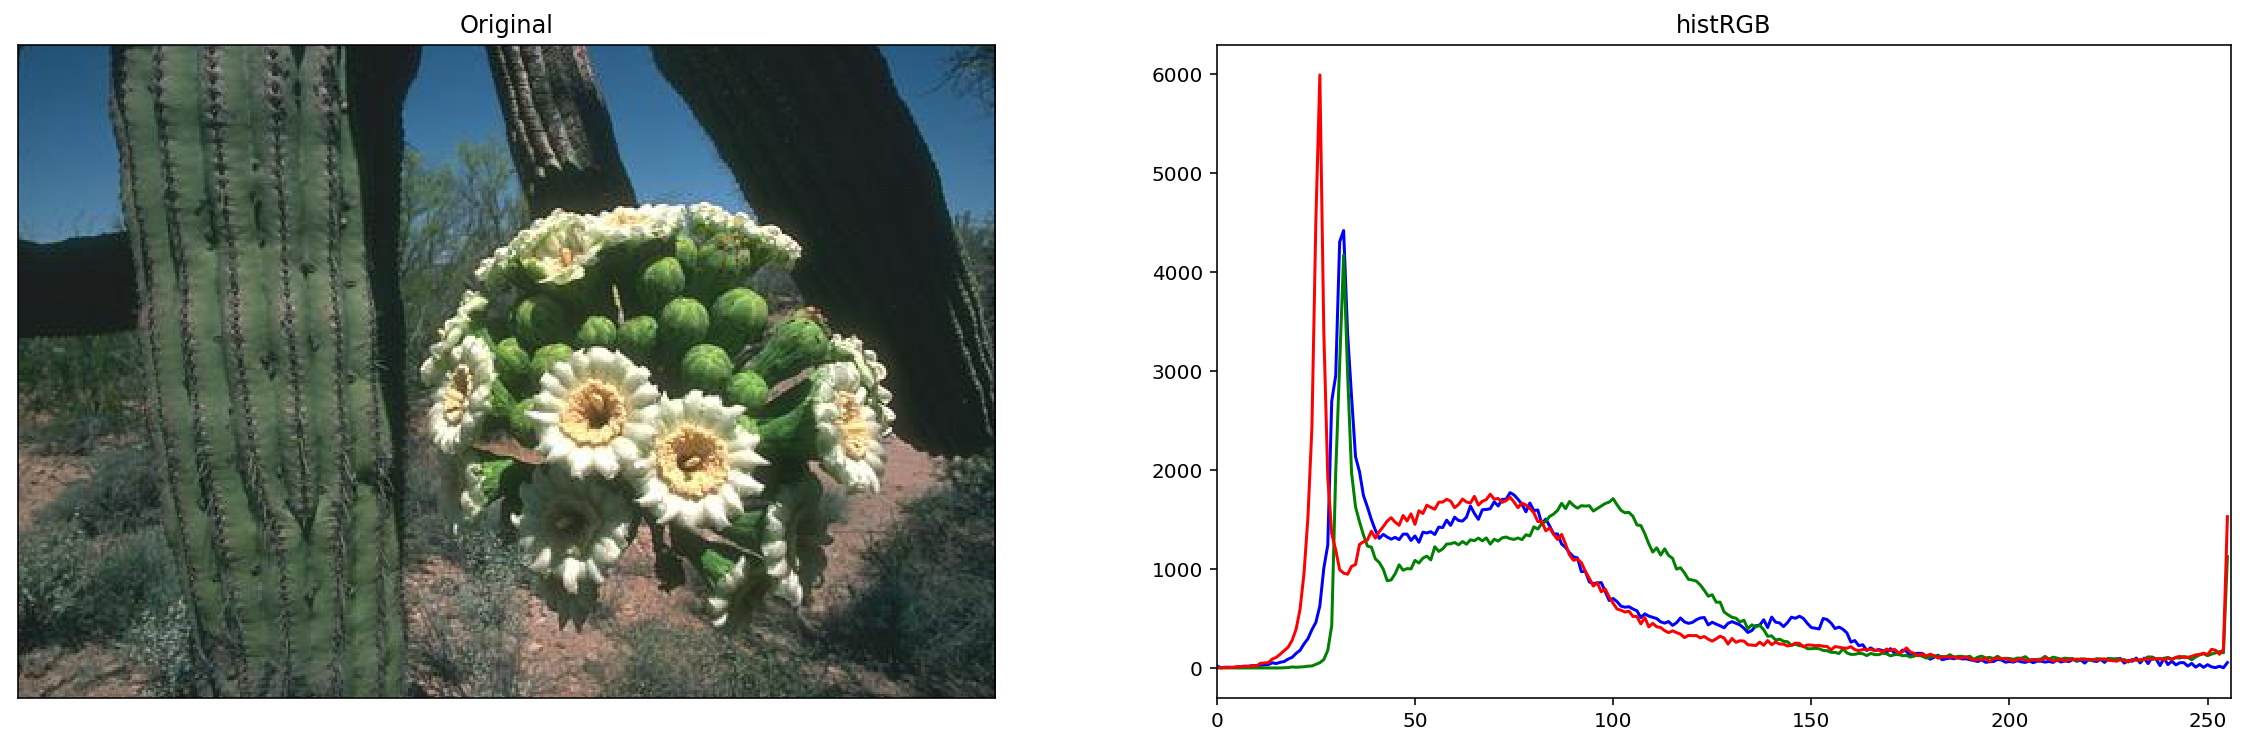

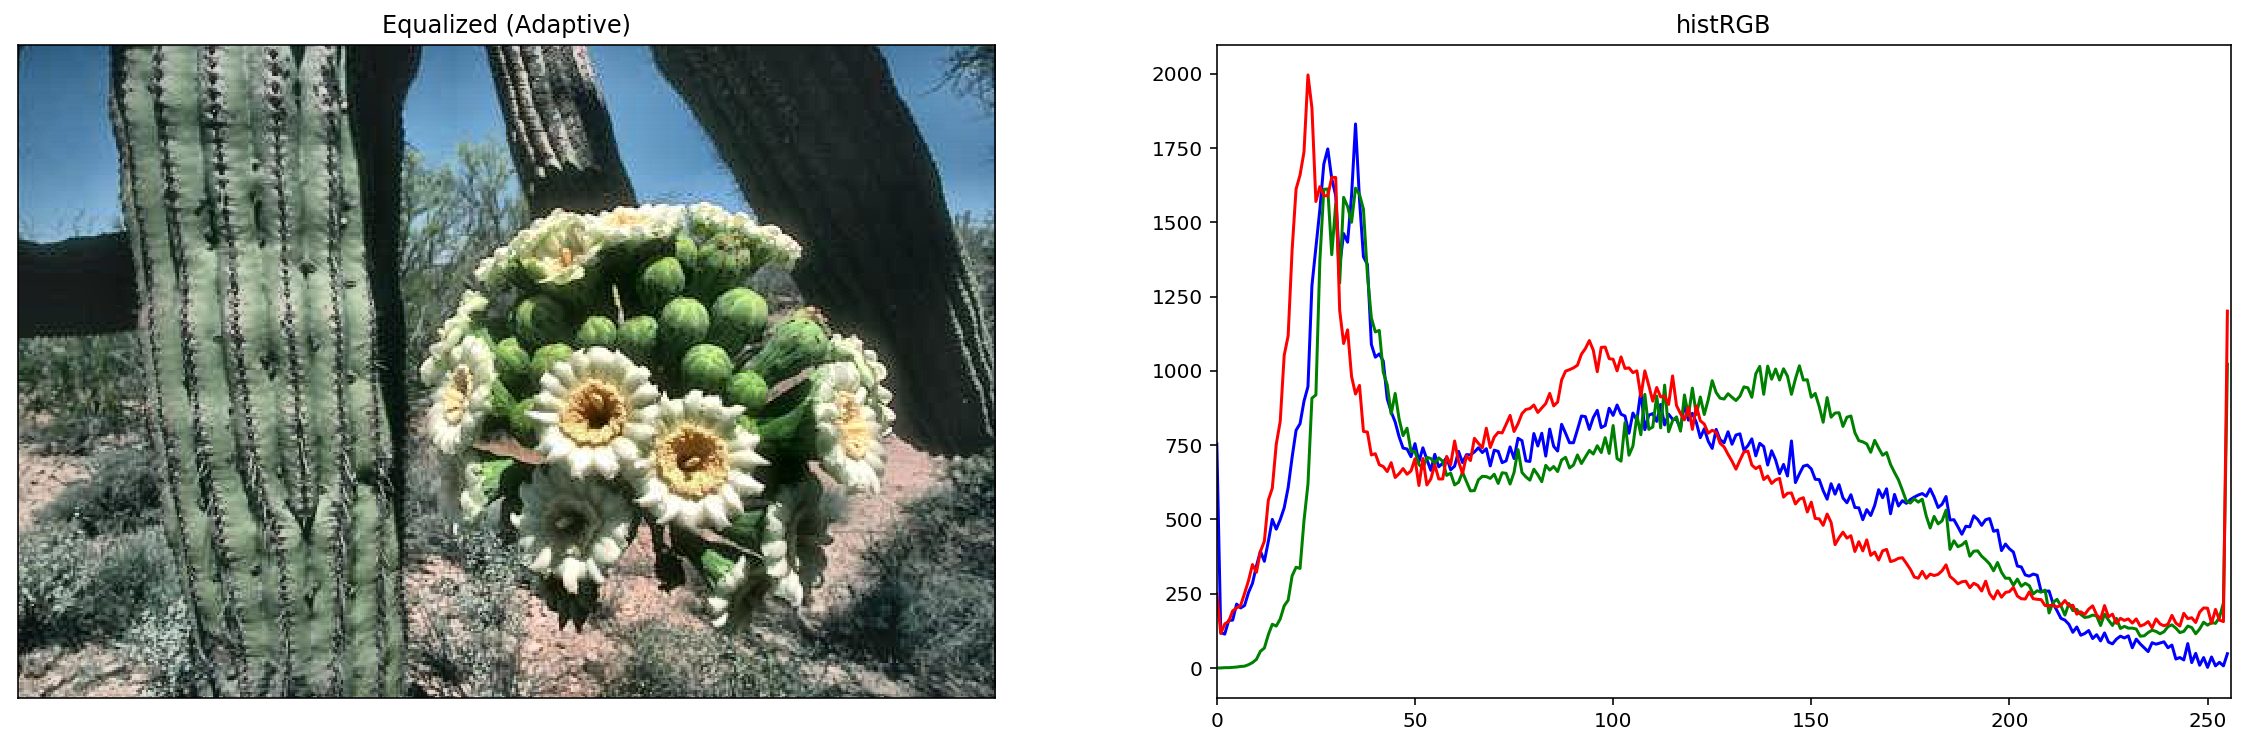

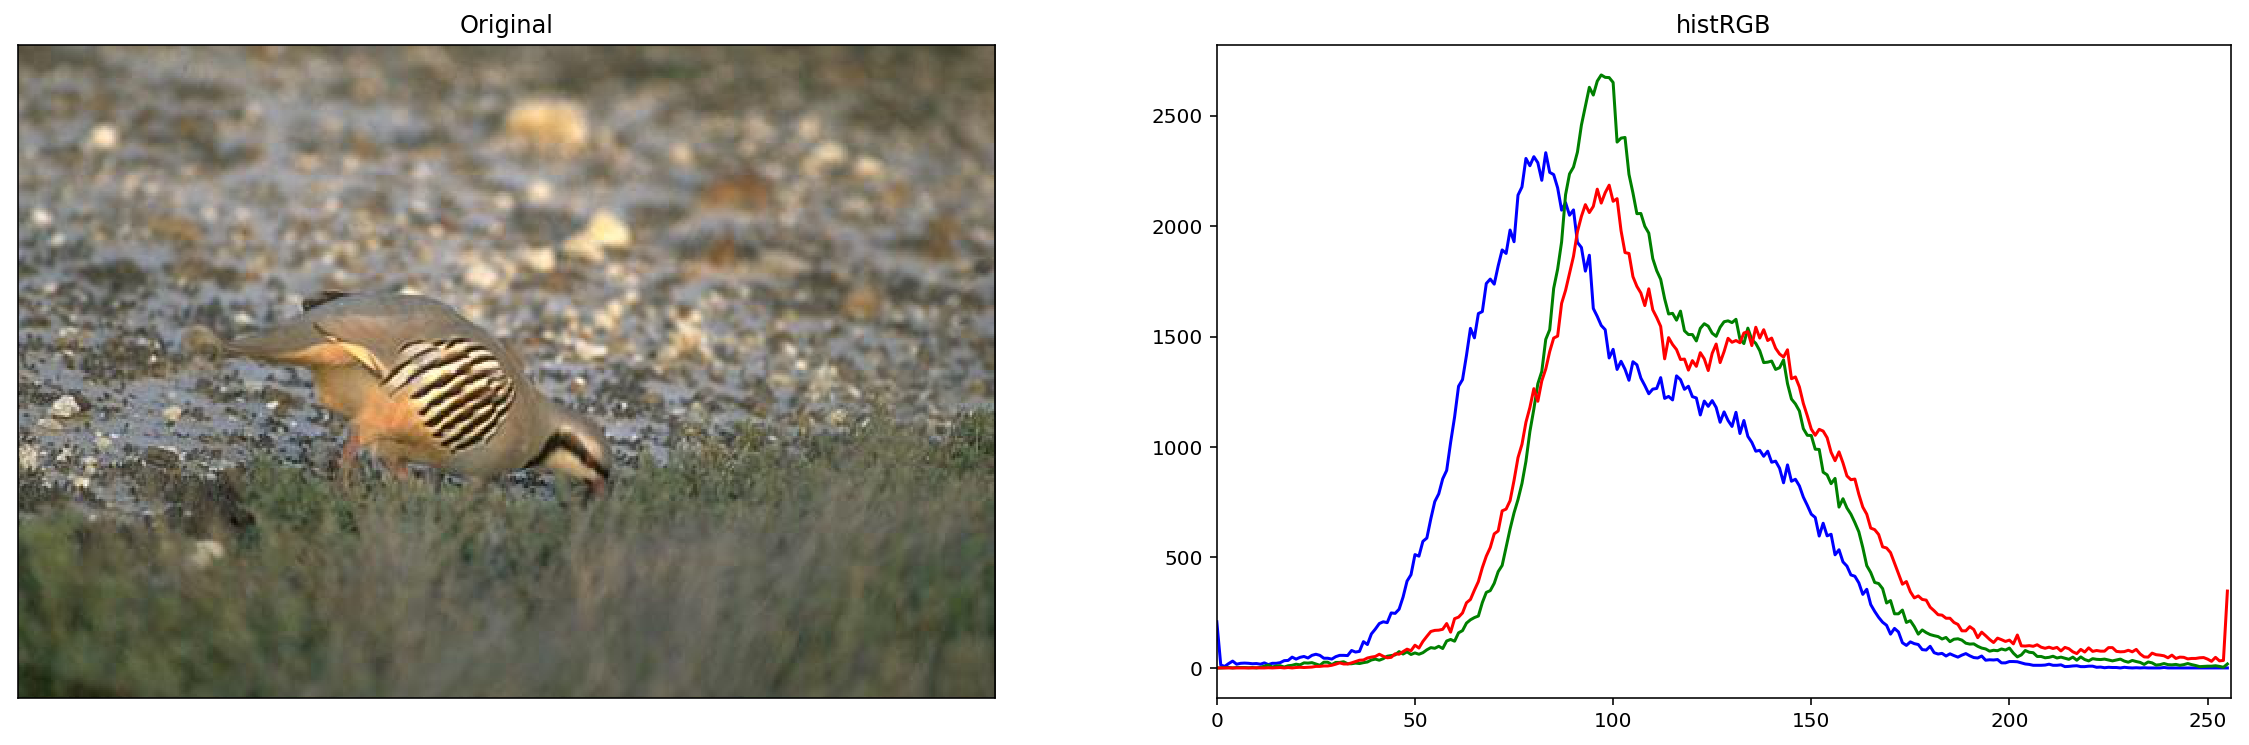

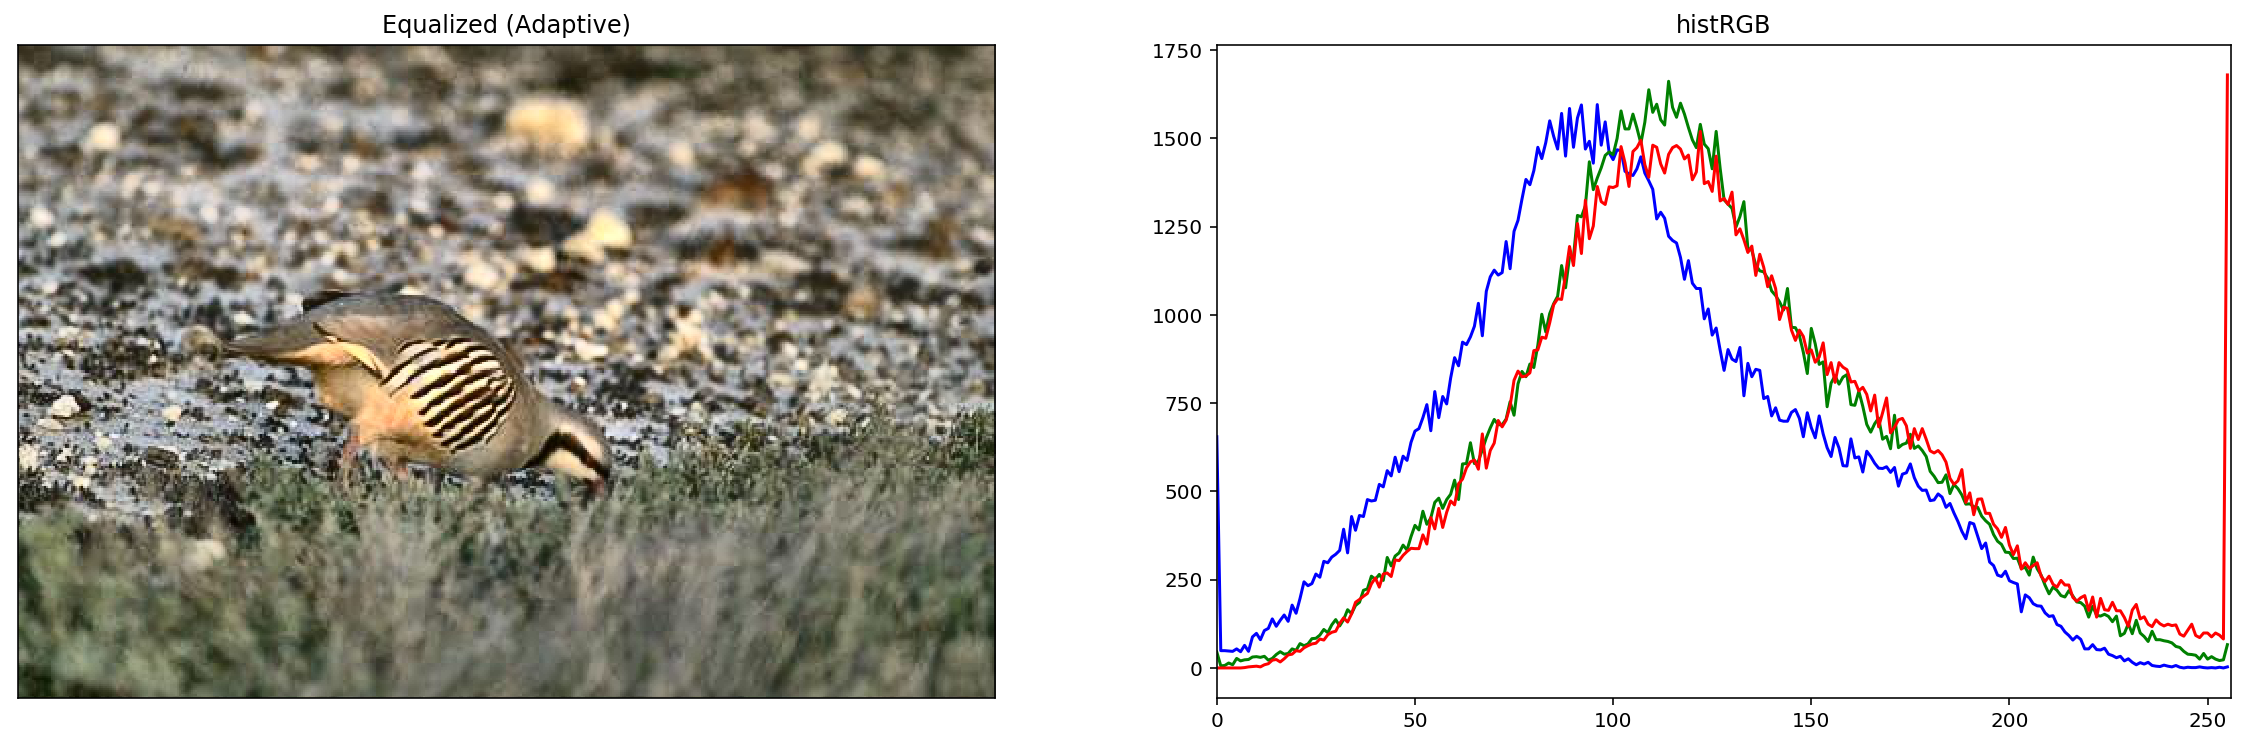

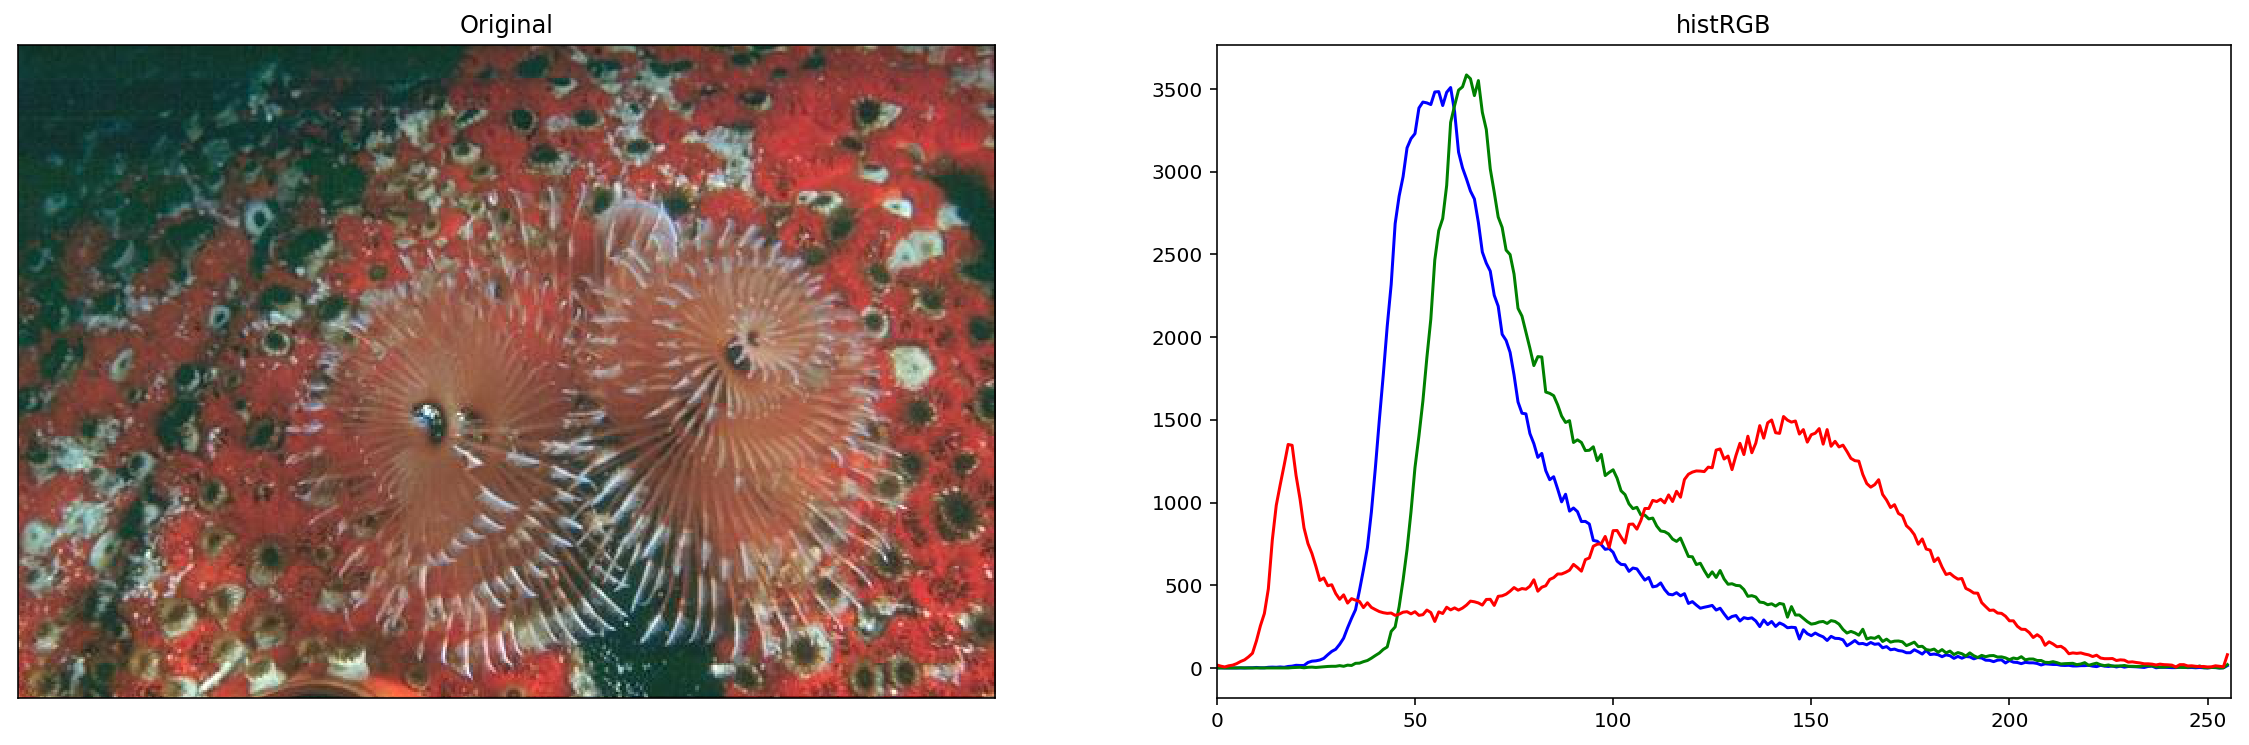

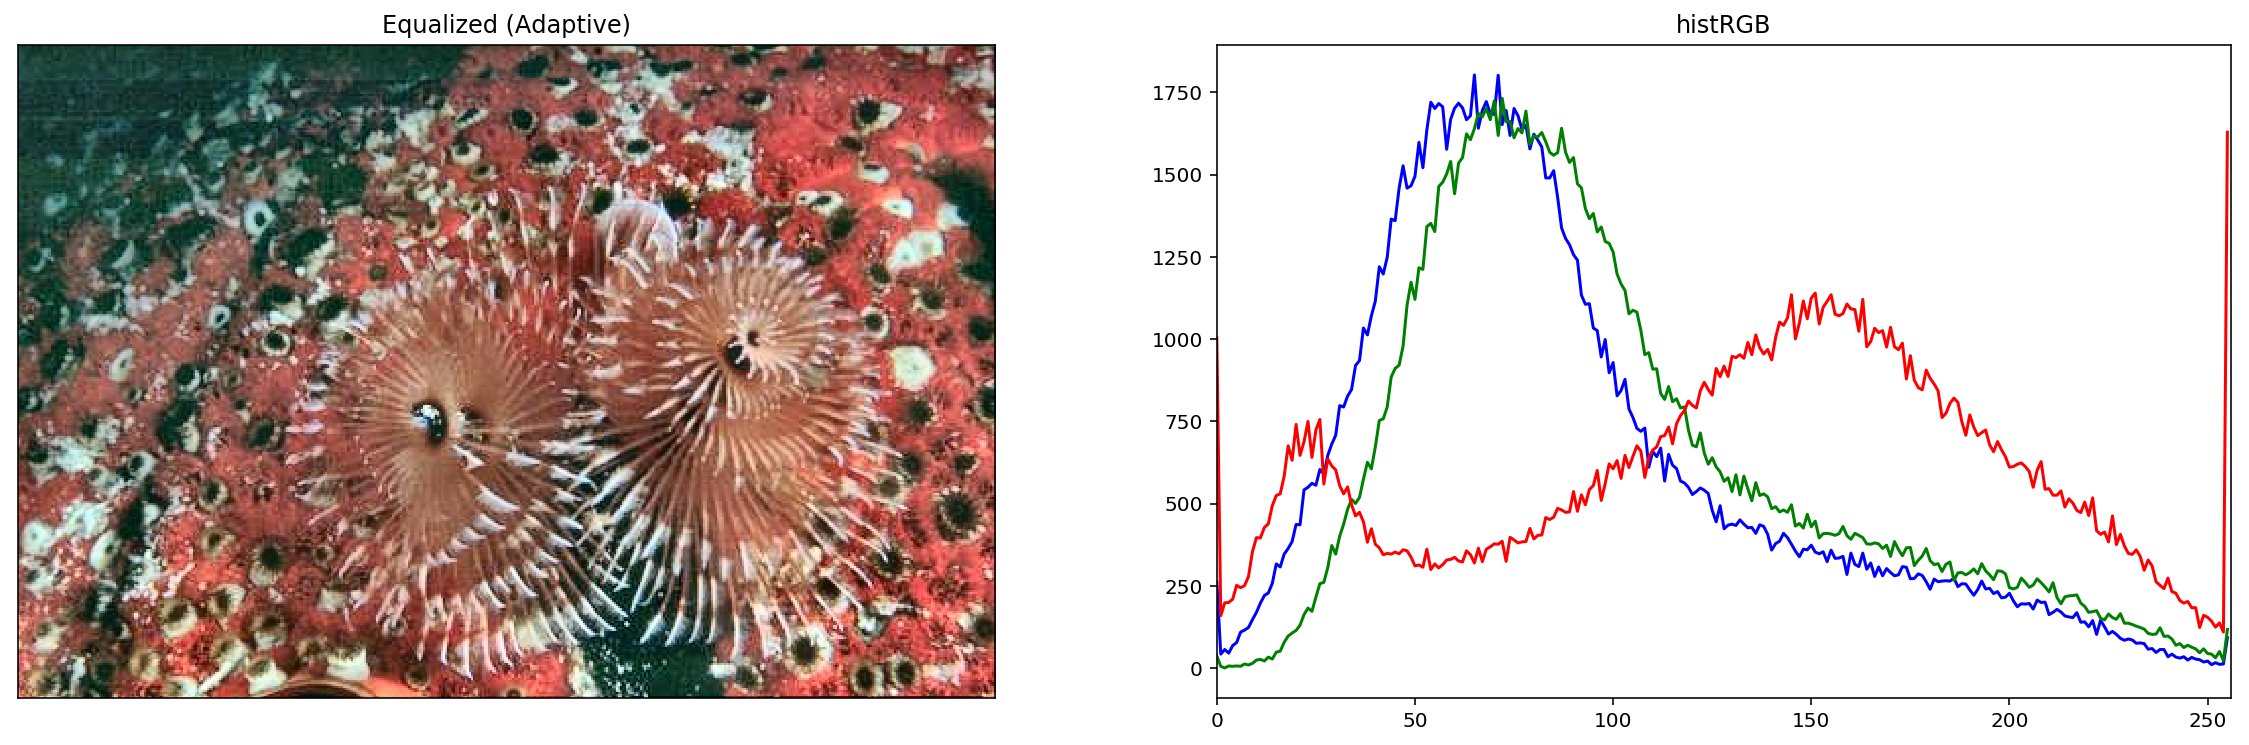

In [5]:
def adaptive_histogram_equalization(imagepath):
    img = cv2.imread(imagepath) # Read the image in color
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV) # Convert the image to YUV
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) # a) Create clahe    
#     print _________________ # b) Print all the hyper parameters used.
    y,u,v = cv2.split(img_yuv)
    y = clahe.apply(y)
    img_yuv = cv2.merge([y,u,v]) # c) Apply CLAHE onto the Y channel
    equ = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR) # Convert back to GBR
    show_histRGB(img, "Original")
    show_histRGB(equ, "Equalized (Adaptive)")

for imagename in IMG_NAMES:
    imagepath = os.path.join('data/img/', imagename)
    adaptive_histogram_equalization(imagepath)

###  d) Did you find any difference between the two techniques? (Please briefly answer this question in this block)
The adaptive method avoid the areas from over exposing. The figure in the image is clearer and other things are also OK.The global method will cause a problem: some area will be  over exposed, so the image will be unclear.